In [1]:
import numpy as np

import torch
import torch.nn as nn

import torchvision
import torchvision.transforms as t
from torch.utils.data import DataLoader

from torchsummary import summary

import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
transformations = t.Compose([t.ToTensor(), t.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))])

In [4]:
train_set = torchvision.datasets.STL10(root="data", download=True, split="train", transform=transformations)
test_set = torchvision.datasets.STL10(root="data", download=True, split="test", transform=transformations)

train_loader = DataLoader(train_set, batch_size=32, shuffle=True, drop_last=True)
test_loader = DataLoader(test_set, batch_size=256)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
print(train_set.data.shape)
print(test_set.data.shape)
print(np.min(train_set.data), np.max(train_set.data))
print(train_set.classes)

(5000, 3, 96, 96)
(8000, 3, 96, 96)
0 255
['airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck']


In [6]:
x, y = next(iter(train_loader))

print(x.data.shape)
print(torch.min(x), torch.max(x))

torch.Size([32, 3, 96, 96])
tensor(-2.1179) tensor(2.6400)


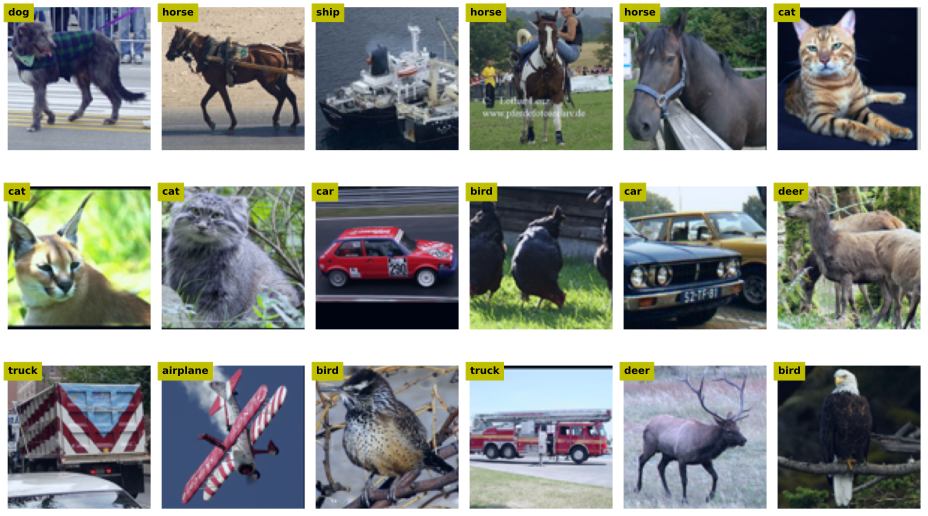

In [7]:
_, axis = plt.subplots(3, 6, figsize=(13, 8))

for i, ax in enumerate(axis.flatten()):
    pic = x.data[i].numpy().transpose((1, 2, 0))
    pic = pic - np.min(pic)
    pic = pic/np.max(pic)
    
    label = train_set.classes[y[i]]
    
    ax.imshow(pic)
    ax.text(0, 0, label, ha="left", va="top", fontweight="bold", color="k", backgroundcolor="y")
    ax.axis("off")

plt.tight_layout();

In [8]:
res_net = torchvision.models.resnet18(weights="ResNet18_Weights.DEFAULT")

In [9]:
res_net

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [10]:
summary(res_net, (3, 96, 96), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 48, 48]           9,408
       BatchNorm2d-2           [-1, 64, 48, 48]             128
              ReLU-3           [-1, 64, 48, 48]               0
         MaxPool2d-4           [-1, 64, 24, 24]               0
            Conv2d-5           [-1, 64, 24, 24]          36,864
       BatchNorm2d-6           [-1, 64, 24, 24]             128
              ReLU-7           [-1, 64, 24, 24]               0
            Conv2d-8           [-1, 64, 24, 24]          36,864
       BatchNorm2d-9           [-1, 64, 24, 24]             128
             ReLU-10           [-1, 64, 24, 24]               0
       BasicBlock-11           [-1, 64, 24, 24]               0
           Conv2d-12           [-1, 64, 24, 24]          36,864
      BatchNorm2d-13           [-1, 64, 24, 24]             128
             ReLU-14           [-1, 64,

In [11]:
for p in res_net.parameters():
    p.requires_grad = False

In [12]:
res_net.fc = nn.Linear(512, 10)

In [13]:
res_net

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [14]:
summary(res_net, (3, 96, 96), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 48, 48]           9,408
       BatchNorm2d-2           [-1, 64, 48, 48]             128
              ReLU-3           [-1, 64, 48, 48]               0
         MaxPool2d-4           [-1, 64, 24, 24]               0
            Conv2d-5           [-1, 64, 24, 24]          36,864
       BatchNorm2d-6           [-1, 64, 24, 24]             128
              ReLU-7           [-1, 64, 24, 24]               0
            Conv2d-8           [-1, 64, 24, 24]          36,864
       BatchNorm2d-9           [-1, 64, 24, 24]             128
             ReLU-10           [-1, 64, 24, 24]               0
       BasicBlock-11           [-1, 64, 24, 24]               0
           Conv2d-12           [-1, 64, 24, 24]          36,864
      BatchNorm2d-13           [-1, 64, 24, 24]             128
             ReLU-14           [-1, 64,

In [15]:
res_net.to(device=device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [16]:
loss_fun = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(res_net.parameters(), lr=0.001, momentum=0.9)

In [17]:
num_epochs = 10

train_loss = []
test_loss = []
train_acc = []
test_acc = []

for epoch in range(num_epochs):
    
    res_net.train()
    batch_loss = []
    batch_acc = []
    
    for x, y in train_loader:
        x = x.to(device)
        y = y.to(device)
        
        y_hat = res_net(x)
        loss = loss_fun(y_hat, y)
        
        batch_loss.append(loss.item())
        
        y = y.cpu()
        y_hat = y_hat.cpu()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        batch_acc.append(100 * torch.mean((torch.argmax(y_hat, axis=1) == y).float()).item())
        
    train_loss.append(np.mean(batch_loss))
    train_acc.append(np.mean(batch_acc))
    
    res_net.eval()

    batch_loss = []
    batch_acc = []
    
    for x, y in test_loader:
        x = x.to(device)
        y = y.to(device)

        with torch.no_grad():
            y_hat = res_net(x)
            loss = loss_fun(y_hat, y)

        y = y.cpu()
        y_hat = y_hat.cpu()

        batch_loss.append(loss.item())

        batch_acc.append(100 * torch.mean((torch.argmax(y_hat, axis=1) == y).float()).item())
    
    test_loss.append(np.mean(batch_loss))
    test_acc.append(np.mean(batch_acc))
    
    print(f"Epoch {epoch+1}/{num_epochs}: Test Acc.: {test_acc[-1]:0.2f}, Test Loss: {test_loss[-1]:0.2f}, Train Acc.: {train_acc[-1]:0.2f}, Train Loss: {train_loss[-1]:0.2f}")
    
del x
torch.cuda.empty_cache()

Epoch 1/10: Test Acc.: 75.21, Test Loss: 0.81, Train Acc.: 59.13, Train Loss: 1.29
Epoch 2/10: Test Acc.: 76.57, Test Loss: 0.73, Train Acc.: 74.98, Train Loss: 0.78
Epoch 3/10: Test Acc.: 77.72, Test Loss: 0.67, Train Acc.: 77.10, Train Loss: 0.69
Epoch 4/10: Test Acc.: 77.45, Test Loss: 0.67, Train Acc.: 78.89, Train Loss: 0.64
Epoch 5/10: Test Acc.: 77.67, Test Loss: 0.66, Train Acc.: 79.23, Train Loss: 0.61
Epoch 6/10: Test Acc.: 78.69, Test Loss: 0.63, Train Acc.: 80.69, Train Loss: 0.58
Epoch 7/10: Test Acc.: 78.50, Test Loss: 0.62, Train Acc.: 81.23, Train Loss: 0.56
Epoch 8/10: Test Acc.: 79.05, Test Loss: 0.61, Train Acc.: 81.63, Train Loss: 0.54
Epoch 9/10: Test Acc.: 78.74, Test Loss: 0.62, Train Acc.: 81.53, Train Loss: 0.53
Epoch 10/10: Test Acc.: 79.05, Test Loss: 0.61, Train Acc.: 82.43, Train Loss: 0.52


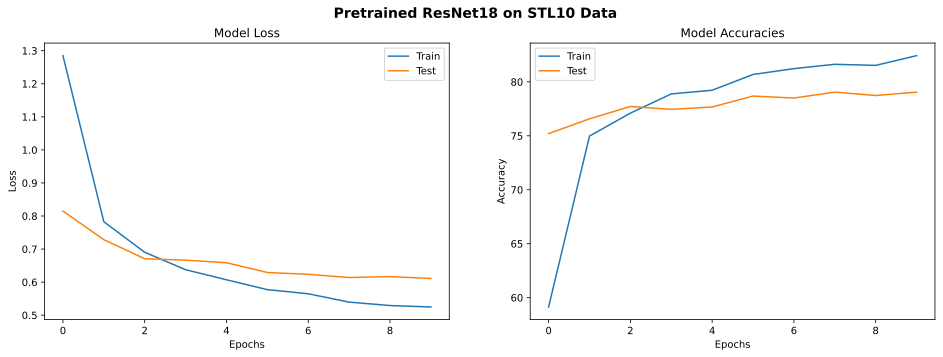

In [18]:
_, axis = plt.subplots(1, 2, figsize=(16, 5))

axis[0].plot(train_loss, "-", label="Train")
axis[0].plot(test_loss, "-", label="Test")
axis[0].set_xlabel("Epochs")
axis[0].set_ylabel("Loss")
axis[0].set_title("Model Loss")
axis[0].legend()

axis[1].plot(train_acc, "-", label="Train")
axis[1].plot(test_acc, "-", label="Test")
axis[1].set_xlabel("Epochs")
axis[1].set_ylabel("Accuracy")
axis[1].set_title("Model Accuracies")
axis[1].legend()

plt.suptitle("Pretrained ResNet18 on STL10 Data", fontweight="bold", fontsize=14);

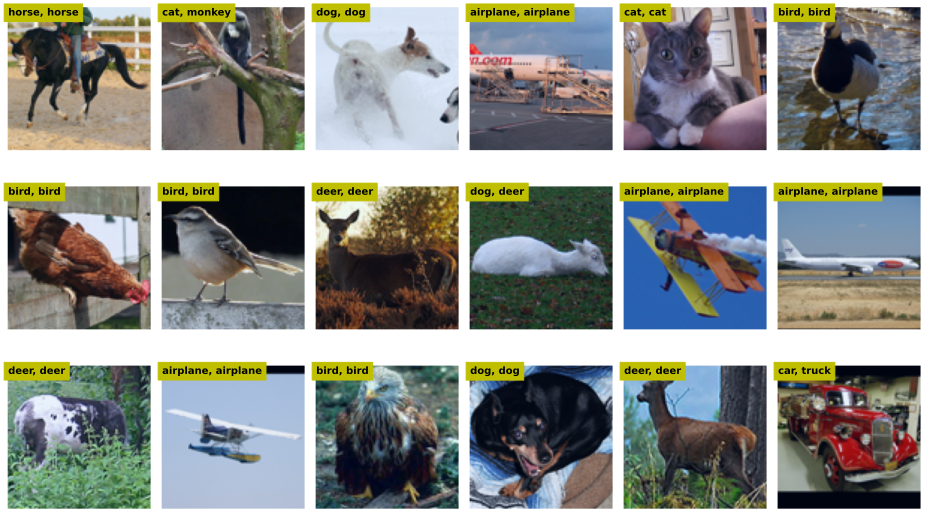

In [19]:
_, axis = plt.subplots(3, 6, figsize=(13, 8))

x, y = next(iter(test_loader))
res_net.to(device="cpu")
y_hat = res_net(x)

for i, ax in enumerate(axis.flatten()):
    pic = x.data[i].numpy().transpose((1, 2, 0))
    pic = pic - np.min(pic)
    pic = pic/np.max(pic)

    label_pred = train_set.classes[torch.argmax(y_hat, axis=1)[i]]
    label_real = train_set.classes[y[i]]

    ax.imshow(pic)
    ax.text(0, 0, f"{label_pred}, {label_real}", ha="left", va="top", fontweight="bold", color="k", backgroundcolor="y")
    ax.axis("off")

plt.tight_layout();